In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
import os

from model_utils import *

In [2]:
%store -r train_label
%store -r val_label
%store -r test_label

%store -r test_all
%store -r train_all
%store -r val_all

In [3]:
test_all = test_all.drop("series_id",axis =1)
train_all = train_all.drop("series_id",axis =1)
val_all = val_all.drop("series_id",axis =1)

In [4]:
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

X_train, y_train = train_all, train_label
X_val, y_val = val_all, val_label
X_test, y_test = test_all, test_label

model = HistGradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)




test_probabilities = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC curve
val_probabilities = model.predict_proba(X_val)[:, 1] 



Validation Accuracy: 0.7500229287812873
Test Accuracy: 0.7486193875786032


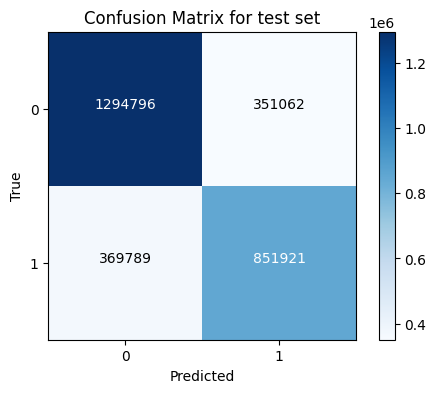

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78   1645858
           1       0.71      0.70      0.70   1221710

    accuracy                           0.75   2867568
   macro avg       0.74      0.74      0.74   2867568
weighted avg       0.75      0.75      0.75   2867568



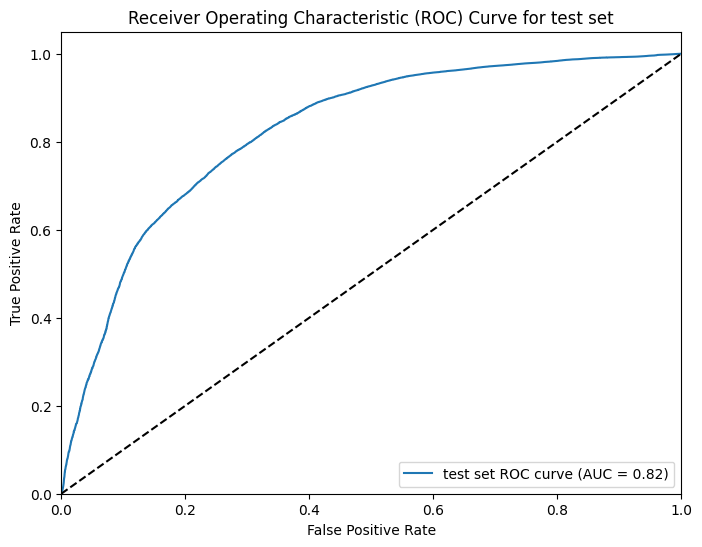

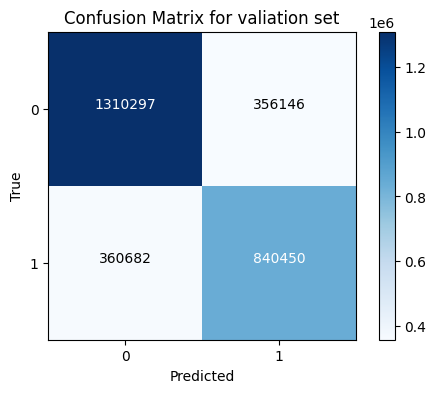

Classification Report for valiation set:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79   1666443
           1       0.70      0.70      0.70   1201132

    accuracy                           0.75   2867575
   macro avg       0.74      0.74      0.74   2867575
weighted avg       0.75      0.75      0.75   2867575



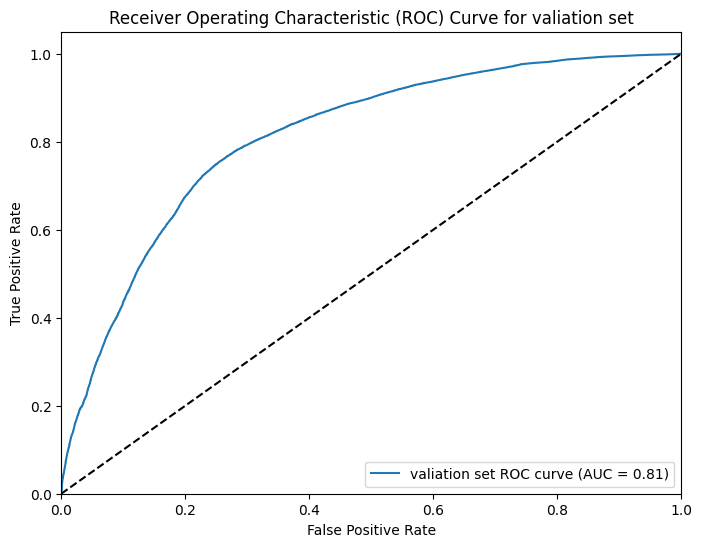

In [40]:
evaluate_model("test",y_test,test_predictions,test_probabilities)
evaluate_model("valiation",y_val,val_predictions,val_probabilities)

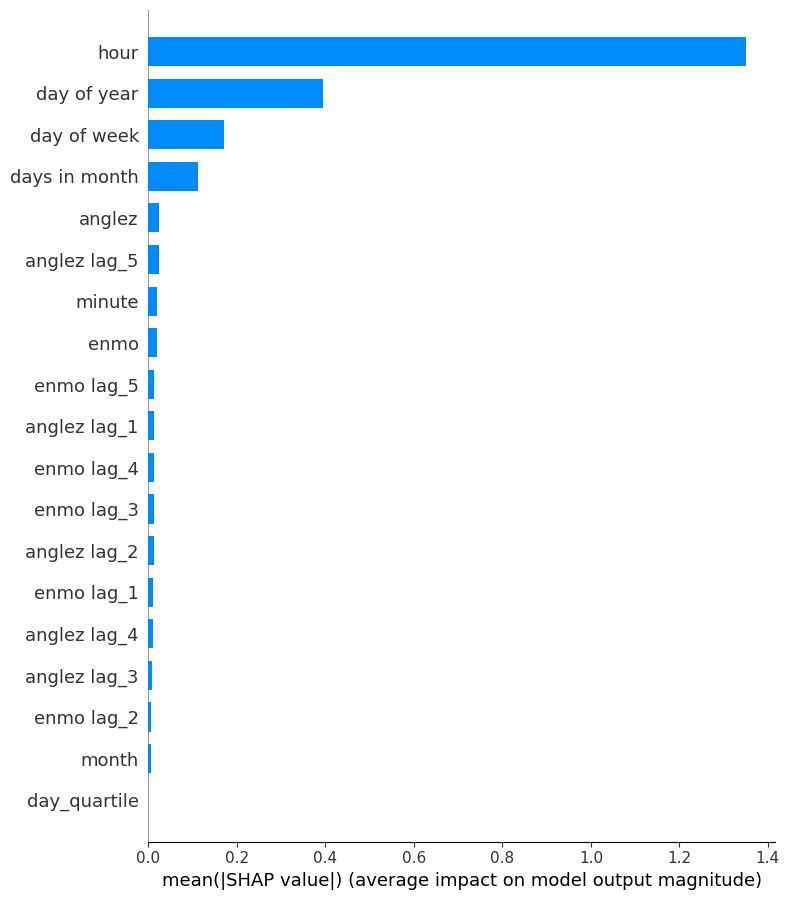

In [41]:
import shap
explainer = shap.Explainer(model)

shap_vals = explainer.shap_values(X_train[100:10000])
shap.initjs()
shap.summary_plot(shap_vals, X_test.iloc[100:10000], plot_type='bar')

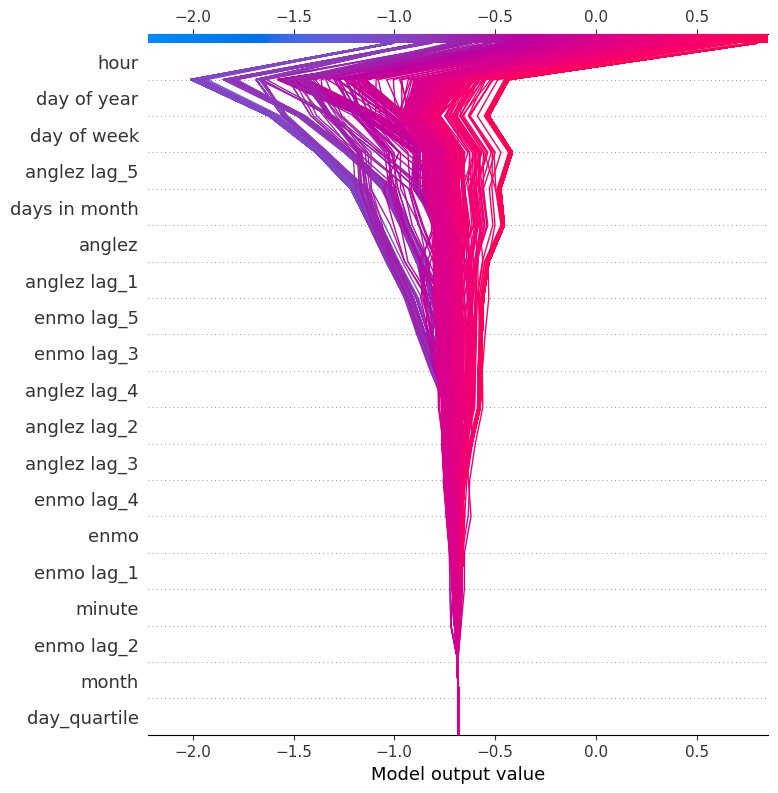

In [39]:
shap.decision_plot(explainer.expected_value[0], shap_vals[500:2000], X_test.columns)

In [42]:
import pandas as pd
from features_utils import *
from eda_utils import *
kaggle_test = pd.read_parquet("../data/test_series.parquet")

In [43]:
kaggle_test.isna().sum()

series_id    0
step         0
timestamp    0
anglez       0
enmo         0
dtype: int64

In [44]:
kaggle_test = clean_df(kaggle_test)
kaggle_test = Categorize_hours(kaggle_test,4)
kaggle_test = add_features(kaggle_test)
kaggle_test = kaggle_test.drop(columns=["series_id","timestamp","date","time","step"],axis = 1)

window_size = 5

kaggle_test = pd.concat([kaggle_test,Create_lag_features(kaggle_test,window_size,"enmo","anglez")],axis = 1)

In [46]:
kaggle_prediction = model.predict(kaggle_test)

In [47]:
kaggle_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,